# Homework 2 Solutions

Welcome to your second homework notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import pandas as pd
import seaborn as sns
import scipy as sp

sns.set_style('white')
sns.set_palette(palette='deep', color_codes=True)

mpl.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.figsize'] = [15, 10]

---

# Problem 0

Read chapters 3 and 4 from Learning from Data. 

**Again** - In the interest of time, read to reinforce what we discussed in class. That is, if we didn't discuss it in class, skip it in the book. 

Right down some questions/comments below:

** EDIT THIS CELL WITH YOUR ANSWERS**

---

# Problem 1 Gradient Descent

In this problem we're going to implement a basic version of gradient descent.

## 1.A - Simple Function
In this problem, lets first look at: 

$$f(x)= x^3 - 2x^2 + 2$$

In [4]:
x = np.linspace(-1,2.5)
f = lambda x: x**3 - 2*x**2 + 2

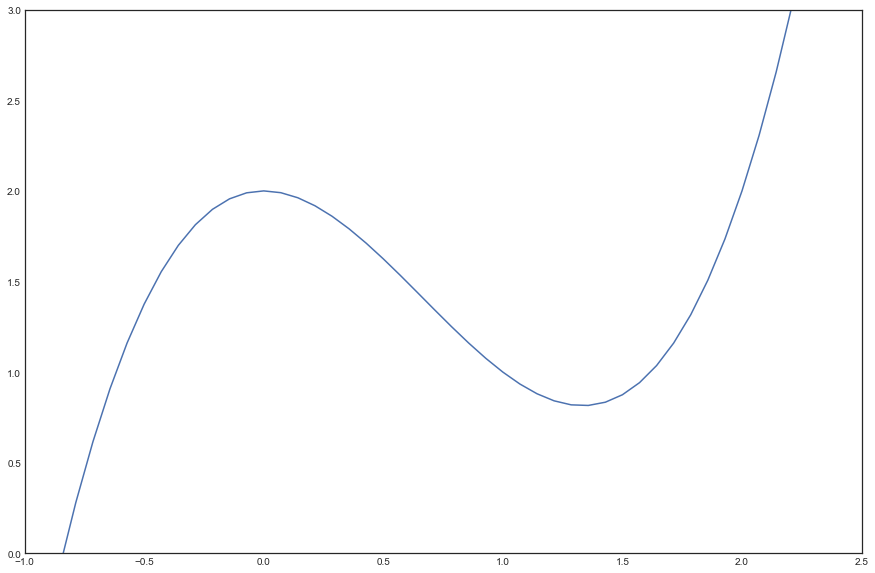

In [7]:
plt.plot(x,f(x));
plt.xlim([-1,2.5]);
plt.ylim([0,3]);

From this, we can see that our global minimum will be somwehre around $x=1.4$, but this is unknown to the optimizer! Lets try to optimize it using the basic **gradient descent** algorithm we discussed in class.

Recall the weight update equation:

$$\boldsymbol{w}(t+1) = \boldsymbol{w}(t) + \eta \hat{\boldsymbol{v}}$$

where $\hat{\boldsymbol{v}}$ is the **unit-vector** in the direction we want to step.

Gradient Descent is then just a step in the direction of the **negative gradient**:

$$\boldsymbol{w}(t+1) = \boldsymbol{w}(t) -\eta\cdot\nabla f(\boldsymbol{w}(t))$$

Below, lets implement the gradient descent step algorithm for this minimize this simple function. 

Before we move on, lets define a function to evaluate the gradient directly:

In [8]:
f_prime = lambda x: 3*x**2-4*x

Now we're ready!

**Note:** In class, we discussed a version where we take up to some maximum number of iterations of GD. We could also just define some **precision** as the difference between our last step and the current step, and stop when that number is small enough. In other words, if our steps are small enough, we can call that done!

In [39]:
initialGuess = 0
eta = 0.05
precision = 0.001

# setup path holding variables
wPath = [initialGuess]
fPath = [f(initialGuess)]

# randomize weights
w_t = np.random.rand()
w_t_new = np.random.rand()

while abs(w_t_new - w_t) > precision:
    # set last iters weights as our current weights
    w_t = w_t_new 
    
    # update weights
    w_t_new = w_t - eta*f_prime(w_t)
    
    # store weights
    wPath.append(w_t_new)
    fPath.append(f(w_t_new))
    

# convert back from list to array
wPath = np.asarray(wPath)
fPath = np.asarray(fPath)

# print start and end points
endPoint = np.round((wPath[-1],wPath[-1]),2)

print("Staring at:{}, GD ended at:{} with {} steps".format(initialGuess, endPoint,fPath.shape[0]))

Staring at:0, GD ended at:[1.33 1.33] with 46 steps


### Visualization

Lets plot it!

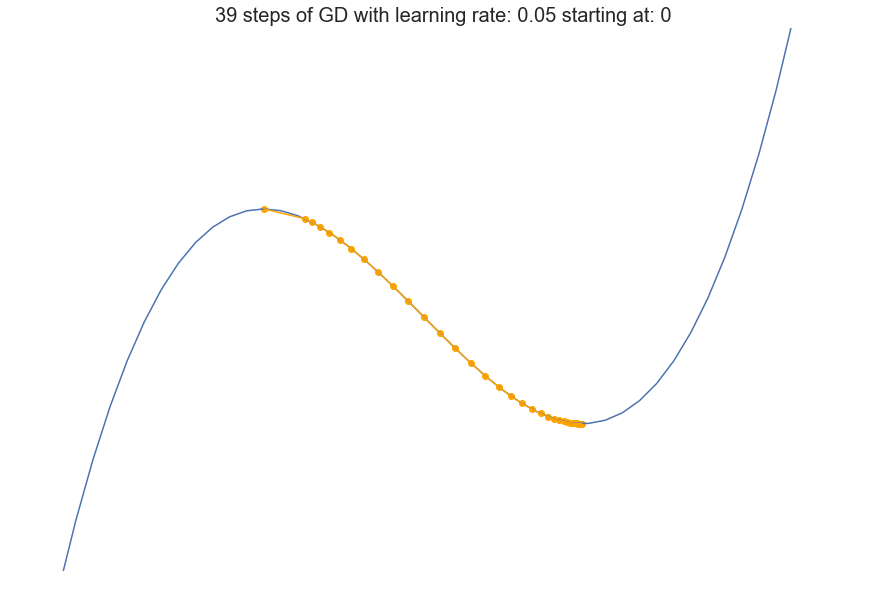

In [35]:
plt.xlim([-1,2.5]);
plt.ylim([0,3]);
plt.axis('off')
plt.title(r"{} steps of GD with learning rate: {} starting at: {}".format(fPath.shape[0],eta,initialGuess), fontsize=20)

plt.plot(x,f(x));
plt.plot(wPath,fPath,color='orange');
plt.scatter(wPath,fPath,color='orange');

Run a couple experiments above, and report your results 

Change the `initialGuess` and `eta`  above a few times and report your results by editing this cell and placing your values in the table below:


|Initial Guess|Eta|End Point|
|-------------|---|---------|
|?|?|?|
|?|?|?|
|?|?|?|
|?|?|?|
|?|?|?|
|?|?|?|


What do you notice? Comment below

** EDIT THIS CELL WITH YOUR ANSWERS **

## 1.B - Hilly Function

Now lets repeat the above analysis with a more "complicated" but still relatively "simple" function:

$$f(x,y) = x^2+2y^2 + 2\sin(2\pi x)\sin(2\pi y)$$

As always, lets first plot it:

In [40]:
X, Y = np.meshgrid(np.linspace(-1,1),np.linspace(-1,1))
f = lambda x,y: x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

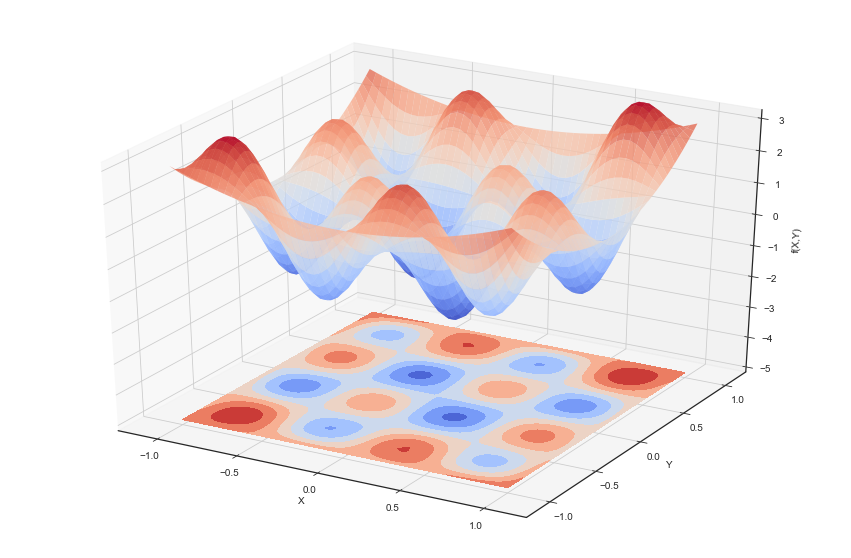

In [42]:
fig = plt.figure();
ax = fig.gca(projection='3d');
ax.set_xlabel('X');
ax.set_xlim(-1.2, 1.2);
ax.set_ylabel('Y');
ax.set_ylim(-1.2, 1.2);
ax.set_zlabel('f(X,Y)');
ax.set_zlim(-5, 3.1);


surface = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8);
contour = ax.contourf(X, Y, f(X,Y), zdir='z', offset=-5, cmap=cm.coolwarm);

Wow! That sure is a "hilly" function. It clearly doesn't have just one minimum, but either way, lets start making some steps and see what we recover!

In [72]:
f_prime_x = lambda x,y: 2 * x + 4 * np.pi * np.cos(2 * np.pi * x)* np.sin(2 * np.pi * y)
f_prime_y = lambda x,y: 4 * y + 4 * np.pi * np.sin(2 * np.pi * x)* np.cos(2 * np.pi * y)

Below we check **both** precision and number of iterations, as our implementation is kind of erratic.

In [71]:
initialGuess = [1,-1]
eta = 0.060
precision = 0.001

maxIterations = 100
currIter = 0

# set starting point
x_t_new = initialGuess[0]
y_t_new = initialGuess[1]
currPrec = precision + 1

# randomize
x_t = np.random.rand()
y_t = np.random.rand()

# setup path holding variables
xPath = [initialGuess[0]]
yPath = [initialGuess[1]]
fPath = [f(initialGuess[0],initialGuess[1])]


# carry out gradient descent
while (currPrec > precision) & (currIter < maxIterations):
    # calculuate precision
    currIter = currIter + 1
    currPrec = np.linalg.norm(np.asarray((x_t_new,y_t_new)) - np.asarray((x_t,y_t)),2)
    
    # set last iters values as our current values
    x_t = x_t_new
    y_t = y_t_new
    
    # take a step in the negative gradient direction
    x_t_new = x_t - eta * f_prime_x(x_t,y_t)
    y_t_new = y_t - eta * f_prime_y(x_t,y_t)

    # store the function value for plotting
    f_t_new = f(x_t_new,y_t_new)
    xPath.append(x_t_new)
    yPath.append(y_t_new)
    fPath.append(f_t_new)
    
# convert back from list to array
xPath = np.asarray(xPath)
yPath = np.asarray(yPath)
fPath = np.asarray(fPath)

# print start and end points
endPoint = (xPath[-1],yPath[-1])

print("Staring at:{}, GD ended at:{} with {} steps".format(initialGuess, endPoint,fPath.shape[0]))

Staring at:[1, -1], GD ended at:(-0.48378975426167636, 0.20707054707221895) with 101 steps


### Visualizations

Lets visualize this run. Here we can visualize the start and end points:

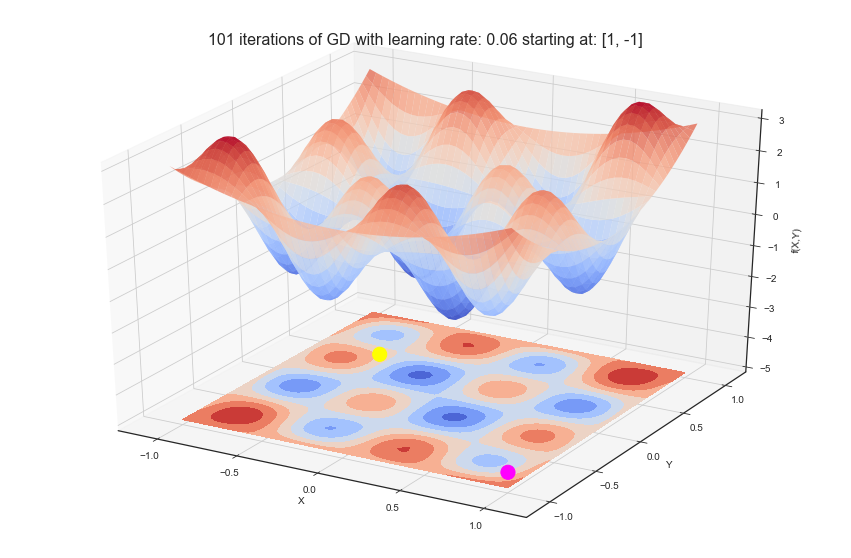

In [73]:
# setup plot
fig = plt.figure();
ax = fig.gca(projection='3d');
ax.set_xlabel('X');
ax.set_xlim(-1.2, 1.2);
ax.set_ylabel('Y');
ax.set_ylim(-1.2, 1.2);
ax.set_zlabel('f(X,Y)');
ax.set_zlim(-5, 3.1);
plt.title(r"{} iterations of GD with learning rate: {} starting at: {}".format(xPath.shape[0],eta,initialGuess), fontsize=16)

# plot the surface and contour plot
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8);
contour = ax.contourf(X, Y, f(X,Y), zdir='z', offset=-5, cmap=cm.coolwarm);

# scatter our gradient descent steps
ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-4.5,-4.5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2));

Here, lets visualize the **path** we took:

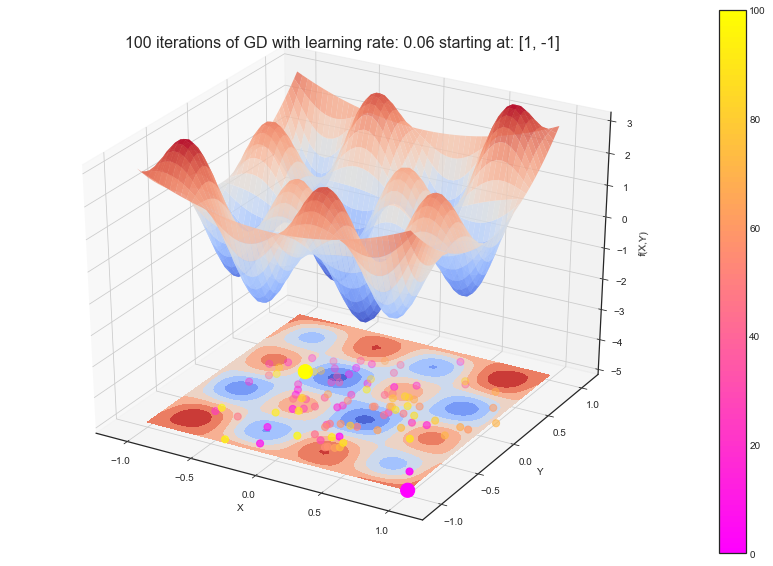

In [74]:
# setup plot
fig = plt.figure();
ax = fig.gca(projection='3d');
ax.set_xlabel('X');
ax.set_xlim(-1.2, 1.2);
ax.set_ylabel('Y');
ax.set_ylim(-1.2, 1.2);
ax.set_zlabel('f(X,Y)');
ax.set_zlim(-5, 3.1);
plt.title(r"{} iterations of GD with learning rate: {} starting at: {}".format(maxIterations,eta,initialGuess), fontsize=16)

# plot the surface and contour plot
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8);
contour = ax.contourf(X, Y, f(X,Y), zdir='z', offset=-5, cmap=cm.coolwarm);

# scatter our gradient descent steps
ax.scatter3D([xPath[0],xPath[-1]],[yPath[0],yPath[-1]],[-5,-5],s=200, alpha=1, c=[0,1], cmap = cm.get_cmap('spring', 2))
scatter = ax.scatter3D(xPath,yPath,-5,c=np.arange(maxIterations+1), cmap = cm.get_cmap('spring', maxIterations+1),s=50);
fig.colorbar(scatter);

In this image, the colorbar serves to let you know in what **order** the steps were taken. What do you notice?

** EDIT THIS CELL WITH YOUR ANSWERS**

Re rerun the method above with the following paramters and fill in the table with your results:

|Initial Guess|Eta|Iterations|End Point|
|-------------|---|----------|---------|
|(-1,-1)|0.1|50|?|
|(-1,-1)|0.05|50|?|
|(-1,-1)|0.03|100|?|
|?,?|?|?|?|
|?,?|?|?|?|
|?,?|?|?|?|
|?,?|?|?|?|

Feel free to start from different points, and fill out more observations on this table. What do you notice?

** EDIT THIS CELL WITH YOUR ANSWERS **

Lets compare this to `scipy`'s build in optimizer.

*Note:* I redefine a *special* version of f above, because of the way `scipy`'s optimizer expects it to be. It expects its input as a vector. 

With a starting point of: [1, -1]
The optimizer ended at : [ 0.24381785 -0.24381786]


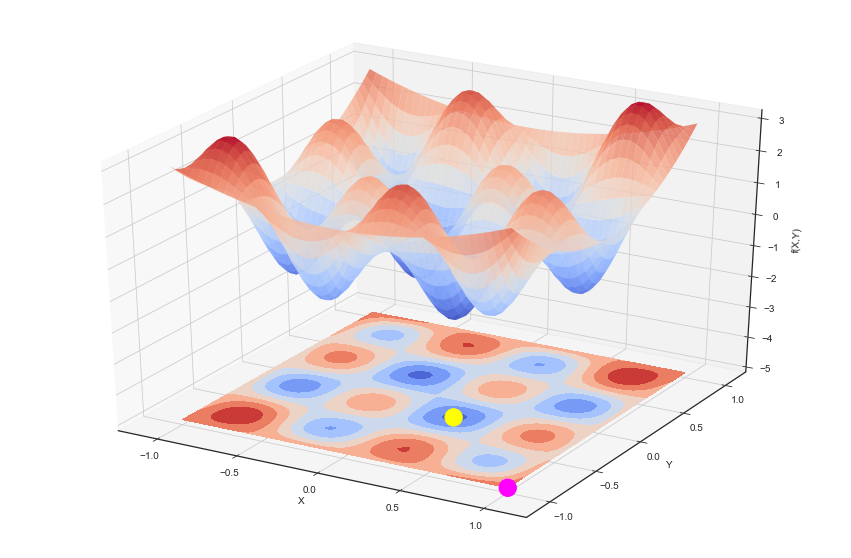

In [75]:
fSpec = lambda vals: vals[0]**2 + vals[1]**2 + 2*np.sin(2*np.pi*vals[0])*np.sin(2*np.pi*vals[1])

initialGuess = [1,-1] # EDIT THIS!

result = sp.optimize.minimize(fSpec,initialGuess)
optimizerEndPoint = result.x
print("With a starting point of:",initialGuess)
print("The optimizer ended at :",optimizerEndPoint)

# setup plot
fig = plt.figure();
ax = fig.gca(projection='3d');
ax.set_xlabel('X');
ax.set_xlim(-1.2, 1.2);
ax.set_ylabel('Y');
ax.set_ylim(-1.2, 1.2);
ax.set_zlabel('f(X,Y)');
ax.set_zlim(-5, 3.1);

# plot the surface and contour plot
surf = ax.plot_surface(X, Y, f(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.8);
cset = ax.contourf(X, Y, f(X,Y), zdir='z', offset=-5, cmap=cm.coolwarm);

# plot the optimization start and end
cmap = cm.get_cmap('spring', 2)
cset = ax.scatter([initialGuess[0], optimizerEndPoint[0]],[initialGuess[1],optimizerEndPoint[1]], -5, s=300, c=[0,1], cmap = cm.get_cmap('spring', 2), alpha=1)

Change the initial guess above to the four corners, and see where you end up. Fill out this table:

|Initial Guess|End Point|
|-------------|---------|
|(1,1)|?|
|(1,-1)|?|
|(-1,1)|?|
|(-1,-1)|?|

What do you notice?

** EDIT THIS CELL WITH YOUR OBSERVATIONS **

---

# Problem 2

In this problem we're going to be exploring the MNIST data set

Lets load the data

In [76]:
trainData = np.loadtxt('Digits.train')
print("Training data shape:", trainData.shape)

testData = np.loadtxt('Digits.test')
print("Training data shape:", testData.shape)

Training data shape: (7291, 257)
Training data shape: (2007, 257)


The data is organized such that each line of our matrix consists of the digit id `(0-9) `followed by the `256` grayscale values. So we extract the first (in python this is the zero-th) digit like this:

In [77]:
label = trainData[0,0]
digit = trainData[0,1:]

Now, we need to `reshape` this vector, into a $16 \times 16$ matrix to plot it:

In [78]:
digitImage = np.reshape(digit,(16,16))

Now we can finally plot it!

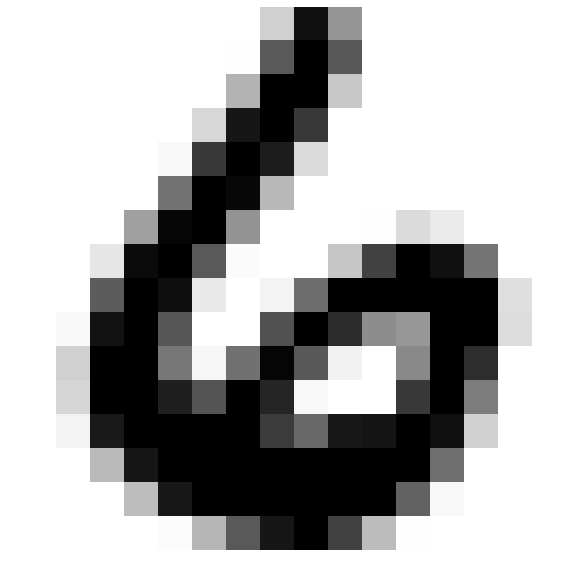

In [79]:
plt.imshow(digitImage,cmap='gray_r');
plt.axis('off');

Its label is: 

In [80]:
print("The label is:",label)

The label is: 6.0


Ok, now we can split this into our actual data and labels:

In [81]:
trainLabels = trainData[:,0].astype('int')
trainData = trainData[:,1:]

testLabels = testData[:,0].astype('int')
testData = testData[:,1:]

Below, we pick a random set of 25 images from this data set to plot:

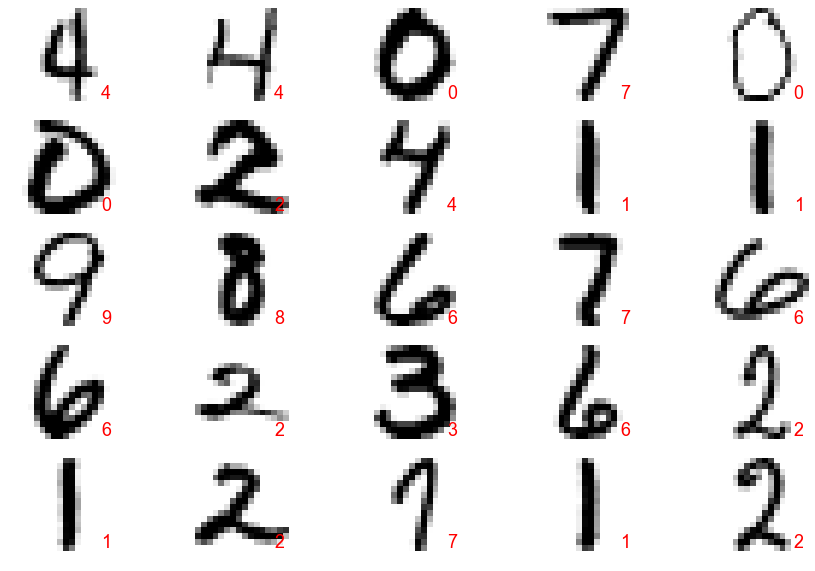

In [82]:
fig, axArr = plt.subplots(5,5,figsize=(15,10));

# loop through all rows
for currRow in range(5):
    # loop through all columns
    for currCol in range(5):
        # select the random digit
        randomDigitNumber = np.random.randint(trainData.shape[0])
        randomDigitLabel = trainLabels[randomDigitNumber]
        randomDigit = trainData[randomDigitNumber,:]
        randomDigitImage = np.reshape(randomDigit,(16,16))
        
        # plot it
        currentAxis = axArr[currRow,currCol];
        currentAxis.axis('off');
        
        currentAxis.imshow(randomDigitImage,cmap='gray_r');
        currentAxis.text(13,15,str(int(randomDigitLabel)),color='red',fontsize=18);

Re-run that cell a couple of times to get a feel for the data. See if you can discover some challenging ones.

Now lets get a feel for our how data is distributed, by plotting a normed histogram of our labels:

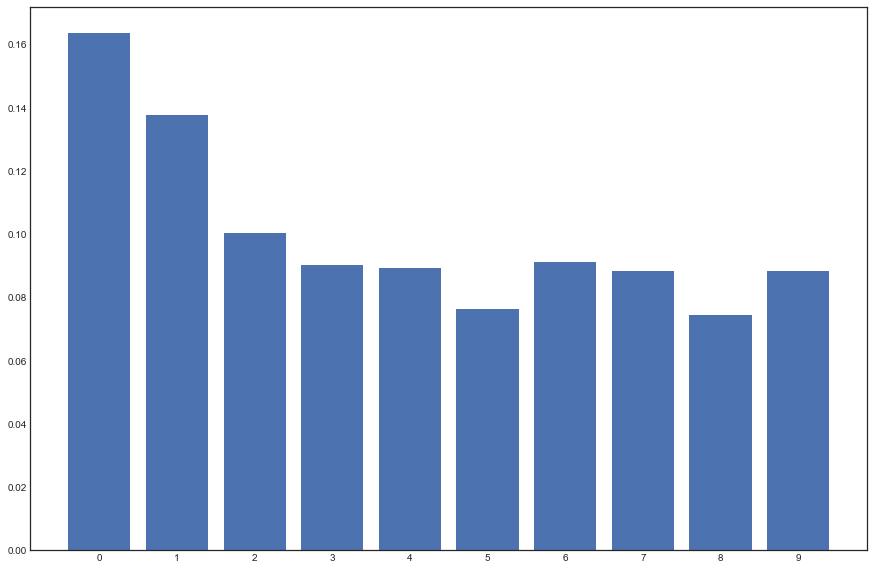

In [83]:
plt.hist(trainLabels, bins=np.arange(11), align='left', rwidth=0.8, density=True);
plt.xticks(np.arange(10));

We can also have numpy gives us the percentages of our labels:

In [84]:
labels,counts = np.unique(trainLabels,return_counts=True)
percentages = np.round(counts/len(trainLabels)*100,2)

for i in range(10):
    currLabel = labels[i]
    currPerc = percentages[i]
    print("Label {} is {}%".format(currLabel,currPerc))

Label 0 is 16.38%
Label 1 is 13.78%
Label 2 is 10.03%
Label 3 is 9.02%
Label 4 is 8.94%
Label 5 is 7.63%
Label 6 is 9.11%
Label 7 is 8.85%
Label 8 is 7.43%
Label 9 is 8.83%


So we have some data inbalance in our training set. We wont deal with that directly in this homework, but its good practice to first **visualize** your data to get a feel for it before you *learn* on it.

## Feature Extraction

As is usual in ML, we're going to extract **features** from the our images. Lets look at two specific features: 

* **intensity** - the sum of all pixel values in an image
* **symmetry** - the **negative** sum of the absolute value of the difference between an image, and its *vertically* flipped version

Intensity should be easy to directly calculate:

In [85]:
intensity = (np.mean(trainData,axis=1)+1)/2

Symmetry requires a little more *thought* about sizes. 

The **bread and butter** of statistical computing in many languages (matlab, python, etc) is reasoning about multi-dimensional matrices. In `numpy` these are called `arrays`. Right now our training data is in the shape `number of Training examples by length of each example`:

In [86]:
trainData.shape

(7291, 256)

In this representation, each "image" is a $256$ length vector. It would be easier for some things, to have this directly in a `16 by 16` array.

Lets `reshape` our training data into a `3 dimensional array` of size: `number of training examples BY 16 by 16`. You can imagine this like this:

![](sizes.png)

**Note**: A useful feature of `reshape` is that we can pass `-1` for one of the dimensions and have `numpy` automagically figure out what it should be for us.

In [87]:
reshapedTrainData = trainData.reshape(-1,16,16)

print("Size of training data before reshape:",trainData.shape)
print("Size of reshaped training data:",reshapedTrainData.shape)

Size of training data before reshape: (7291, 256)
Size of reshaped training data: (7291, 16, 16)


With this, we can now calculate **symmetry** to be:

In [89]:
# horizontal symmetry
horizFlip = np.flip(reshapedTrainData,axis=1)
horizSym = np.mean(np.abs(reshapedTrainData - horizFlip),axis=(1,2))

# vertical symmetry
vertFlip = np.flip(reshapedTrainData,axis=2)
vertSym = np.mean(np.abs(reshapedTrainData - vertFlip),axis=(1,2))

# stack and average
symmetry = -np.mean(np.column_stack((horizSym,vertSym)),axis=1)

Now we have calculated our features for each training example, lets stack them together into an object we can deal with:

In [90]:
trainFeatures = np.column_stack((intensity,symmetry))
trainFeatures.shape

(7291, 2)

So we've reduced the `7291 x 256` training data to our `7291 x 2` feature representation.

## 1 vs 5

Lets now focus just on trying to tell apart a $1$ from a $5$. Since its annoying to keep track of sizes, were going to introduce the `pandas` library.

In [91]:
df = pd.DataFrame(trainFeatures,columns=['Intensity','Symmetry'])
df['Label'] = trainLabels

df.head()

,Intensity,Symmetry,Label
0,0.341092,-0.566117,6
1,0.444131,-0.687102,5
2,0.231002,-0.360844,4
3,0.200275,-0.441797,7
4,0.291936,-0.544008,3


Now we can define a dataframe specifically for labels of `1` or `5` using `masking`, where we've replaced the `5` label with a `-1` label:

In [92]:
df1or5 = df[(df.Label == 1) | (df.Label == 5)].copy()
df1or5.loc[df1or5['Label'] == 5,'Label'] = -1
df1or5.head()

,Intensity,Symmetry,Label
1,0.444131,-0.687102,-1
7,0.123043,-0.088484,1
9,0.113859,-0.116422,1
12,0.115371,-0.048250,1
13,0.102281,-0.047352,1


With this in hand, we can `scatter` them in feature space: 

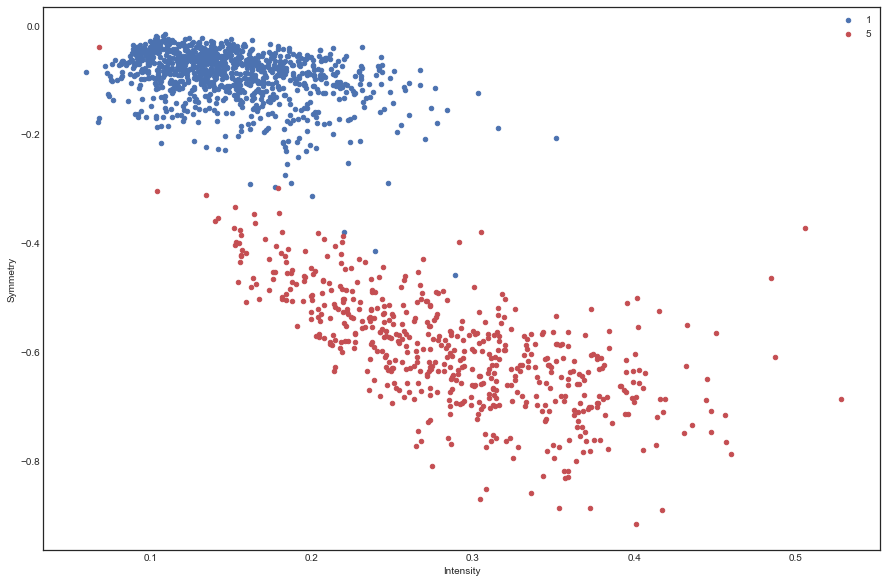

In [93]:
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

Already we can see that there is some nice separation for these two features, on these two digits.

## 2.A - Linear Regression for Classification

Now, we're going to implement our linear regression classifier that we discussed in class. Recall for linear regression we solve to get:

$$
X \in \mathbb{R}^{N \times d} =
\begin{bmatrix}
\text{---}  \boldsymbol{x}^T_1  \text{---} \\
\text{---}  \boldsymbol{x}^T_2 \text{---} \\
 \vdots  \\
\text{---}  \boldsymbol{x}^T_N  \text{---}
\end{bmatrix} \;\;\;\; \text{and} \;\;\;\;
\boldsymbol{y} \in \mathbb{R}^{N}= 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_N
\end{bmatrix} \\[0.75in]
\boldsymbol{w}_{lin} = \left( X^T X\right)^{-1} X^T \cdot \boldsymbol{y}
$$ 

**Note:** In class we glossed over a small conceptual point - To get this very slick notation,  we implicitly deal with the *intercept/bias* term by including it in as a *feature* of value $1$. This means that for us, we have each example represented as: 
$$\boldsymbol{x}^T = [1, intensity, symmetry]$$

And so our weight matrix will be of size $3$: 
$$\boldsymbol{w}_{lin} = [w_1, w_2, w_3]$$ 

Recall that in python, these will actually be 
$$w_0, w_1, w_2$$

Below, we will be implementing this

In [94]:
X = df1or5[['Intensity', 'Symmetry']].as_matrix()
X.shape

(1561, 2)

Lets go about actually adding that column of $1$'s:

In [95]:
X = np.column_stack((np.ones(1561),X))
X.shape

(1561, 3)

In [96]:
y = df1or5['Label'].as_matrix()
y.shape

(1561,)

Now we're ready to actually implement the above formula!

In [97]:
w_lin = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
w_lin.shape

(3,)

And thats it! We're done learning! Wow! That was easy!

In order to visualize the line specified by our weight vector, we need to convert that format to the more familiar slope, intercept format. 

In [100]:
slope_lin = -(w_lin[0]/w_lin[2])/(w_lin[0]/w_lin[1])
intercept_lin = -w_lin[0]/w_lin[2]

Now we're ready to plot the decision boundary created by our weight vector:

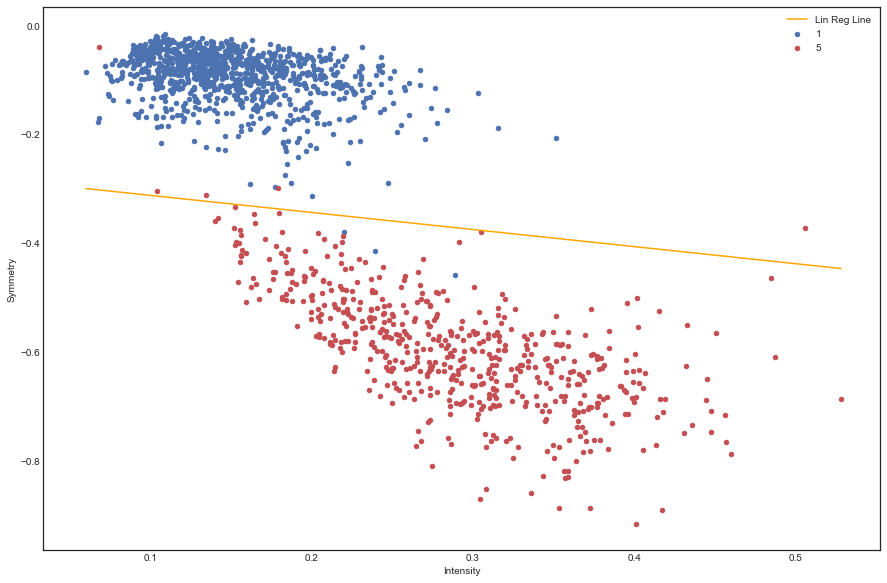

In [103]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin,color='orange',label='Lin Reg Line');

plt.legend();

What do you notice about this line?

**EDIT THIS CELL WITH YOUR COMMENTS**

Lets actually use this to **classify**, and generate a $\boldsymbol{\hat{y}}$:

In [104]:
y_hat = np.sign(X.dot(w_lin))

Now lets visualize those wrong points:

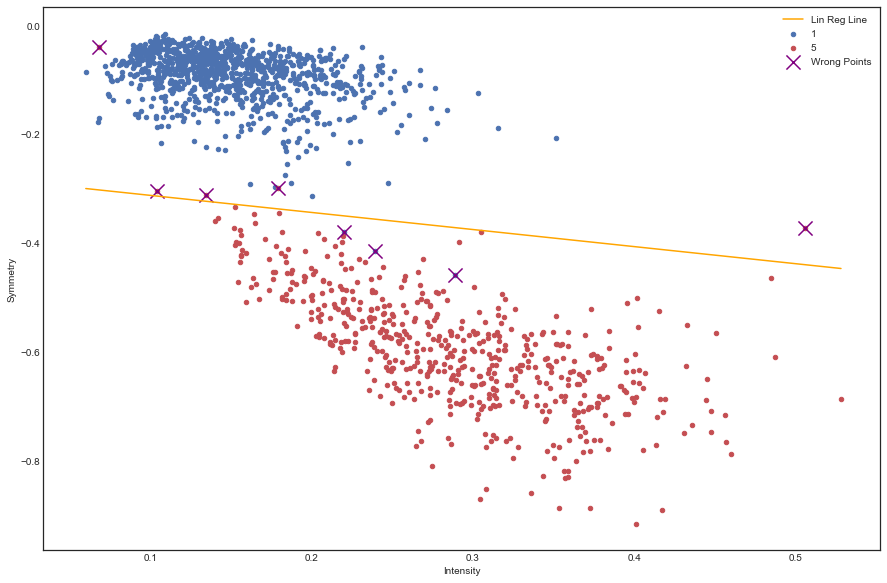

In [111]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin,color='orange',label='Lin Reg Line');

# plot wrong points
wrongPoints = X[np.invert(y_hat == y)]
plt.scatter(wrongPoints[:,1], wrongPoints[:,2], color='purple',s=200,marker='x',label='Wrong Points');

plt.legend();

Just for completion, we can compare our hard coded result, to `scikit learn`'s ordinary least squares implementation of linear regression:

In [112]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X[:,1:], y)
print("Regression coefficiants:",reg.coef_)
print("Regression intercept:",reg.intercept_)

Regression coefficiants: [1.24859547 3.9802532 ]
Regression intercept: 1.1158801627688733


Compare to our weight vector (which contains the intercept within it, as explained above):

In [113]:
w_lin

array([1.11588016, 1.24859547, 3.9802532 ])

They're exact! Why is this expected or not-expected? Reflect below:

** EDIT THIS CELL WITH YOUR ANSWER**

## 2.B - Logistic Regression for Classification

Now that we have a firm understanding of GD under our belt, we can **finally** tackle logistic regression!

Recall from class that for logistic regression, we are trying to minimize the **cross-entropy** loss:

$$
E_{in} = \frac{1}{N}\sum_{i=1}^N\ln\left(1+e^{-y_n\boldsymbol{w}^T\boldsymbol{x}_n}\right)
$$

You might remember how to calculate the gradient of this function directly. If you don't here it is!

$$
\nabla E_{in} = -\frac{1}{N}\sum_{n=1}^N \frac{y_n\boldsymbol{x}_n}{1+e^{y_n\boldsymbol{w}^T(t)\boldsymbol{x}_n}}
$$

With that in hand, then the algorithm for logistic regression is simply:

1. Initialize weights at time step $t=0$
2. For $t=0,1,\ldots,N$ do:
  * Compute the gradient described above: $\nabla E_{in}(\boldsymbol{w}(t))$
  * Move in the negative gradient direction: $\hat{\boldsymbol{v}}_t = - \nabla E_{in}(\boldsymbol{w}(t))$
  * Update the weights: $\boldsymbol{w}(t+1) = \boldsymbol{w}(t) + \eta \boldsymbol{v}_t$
  
3. Return $\boldsymbol{w}_{log}$

In [120]:
N = X.shape[0]
maxIter = 1000
eta = 0.5

# setup random weight values
w_log = np.random.rand(3)

# take a gradient descent step
for i in range(maxIter):
    
   
    # placeholder for running sum
    runningSum = 0    

    # calculate gradient at current weights
    for n in range(N):
        numerator = y[n]*X[n,:]
        denom = 1 + np.exp(y[n]*w_log.dot(X[n,:]))
        runningSum += numerator/denom

    eInGrad = -runningSum/N

    # take a step in the negative gradient direction
    w_log_new = w_log -eta*eInGrad
    
    # store for the next round
    w_log = w_log_new

In [121]:
slope_log = -(w_log[0]/w_log[2])/(w_log[0]/w_log[1])
intercept_log = -w_log[0]/w_log[2]

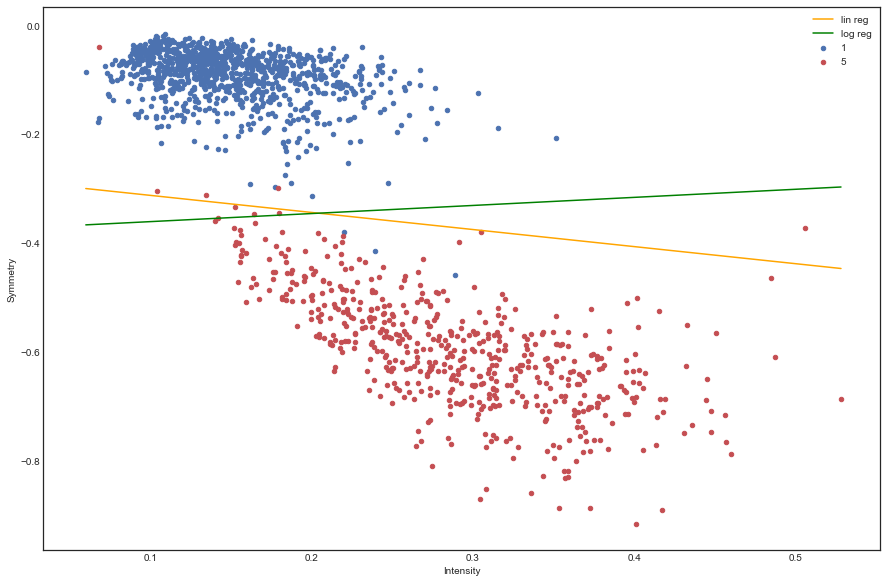

In [158]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin, color='orange', label='lin reg');

# plot our logistic regression line
plt.plot(intensityRange,slope_log*intensityRange+intercept_log, color='green', label='log reg');

plt.legend();

Lets compare to `scikit`'s implementation:

In [148]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X[:,1:], y)
print("Regression coefficiants:",logreg.coef_)
print("Regression intercept:",logreg.intercept_)

Regression coefficiants: [[-1.60527293 12.63784058]]
Regression intercept: [4.66554566]


In [149]:
logCoef = logreg.coef_[0]
logInter = logreg.intercept_

In [150]:
slope_log_sp = -(logInter/logCoef[1])/(logInter/logCoef[0])
intercept_log_sp = -logInter/logCoef[1]

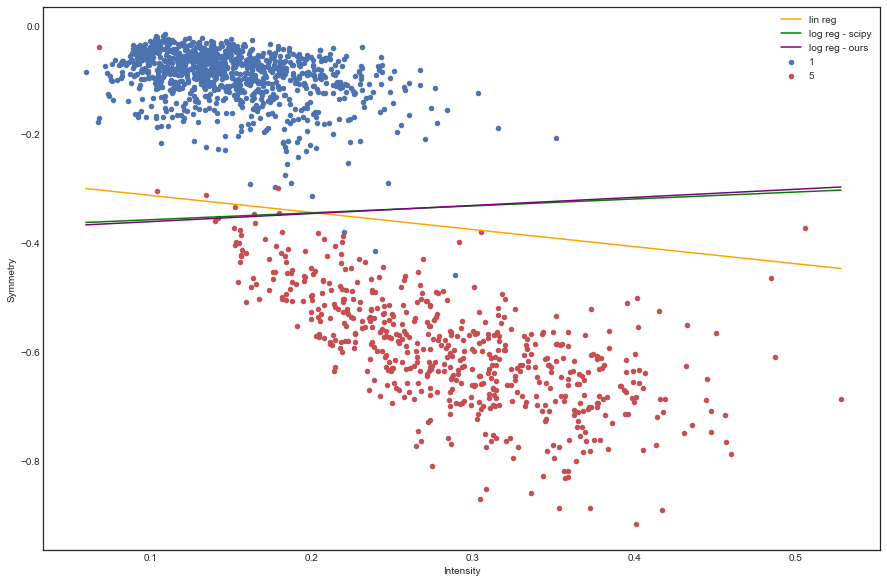

In [162]:
intensityRange = np.linspace(df1or5.Intensity.min(), df1or5.Intensity.max())

# plot 1's
ax = df1or5[df1or5.Label == 1].plot.scatter(x='Intensity',y='Symmetry',label='1', color='b');

# plot 5's
df1or5[df1or5.Label == -1].plot.scatter(x='Intensity',y='Symmetry', label='5', ax=ax, color='r');

# plot our linear regression line
plt.plot(intensityRange,slope_lin*intensityRange+intercept_lin, color='orange', label='lin reg');

# plot our logistic regression line
plt.plot(intensityRange,slope_log_sp*intensityRange+intercept_log_sp, color='green', label='log reg - scipy');
plt.plot(intensityRange,slope_log*intensityRange+intercept_log, color='purple', label='log reg - ours');

plt.legend();

Reflect on the above. What do you notice?

** EDIT THIS CELL WITH YOUR ANSWERS **

## 2.C - New Features

As we did above, define **your own** features and repeat the above analysis with wither Linear regression, logistic regression, or **both** on those **new features**! You can also try looking at different digit comparisons!

The depth and quality of your investigation determines the score for this part!